In [89]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/Bryant35/Data_Mining/main/ALP2/Diabetespred.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
494,3,80,0,0,0,0.0,0.174,22,0
495,6,166,74,0,0,26.6,0.304,66,0
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0


## EDA

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [92]:
df.duplicated().sum()

0

In [93]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Classification

In [94]:
X = df.drop(['Outcome'], axis=1)
y = df[['Outcome']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Decision Tree

In [96]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
predict = classifier.predict(X_test)
print(y_test)
print(predict)
print('accuracy score Desicion Tree adalah {}'.format(classifier.score(X_train, y_train)))

     Outcome
90         0
254        1
283        1
444        1
474        0
..       ...
429        1
49         0
134        0
364        0
397        1

[125 rows x 1 columns]
[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy score Desicion Tree adalah 1.0


### Naive Bayes

In [97]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predict = NB.predict(X_test)
print(y_test)
print(predict)
print('Accuracy score Naive Bayes adalah {}'.format(NB.score(X_train, y_train)))

     Outcome
90         0
254        1
283        1
444        1
474        0
..       ...
429        1
49         0
134        0
364        0
397        1

[125 rows x 1 columns]
[0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
Accuracy score Naive Bayes adalah 0.7620320855614974


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Clustering

### Hierarchical

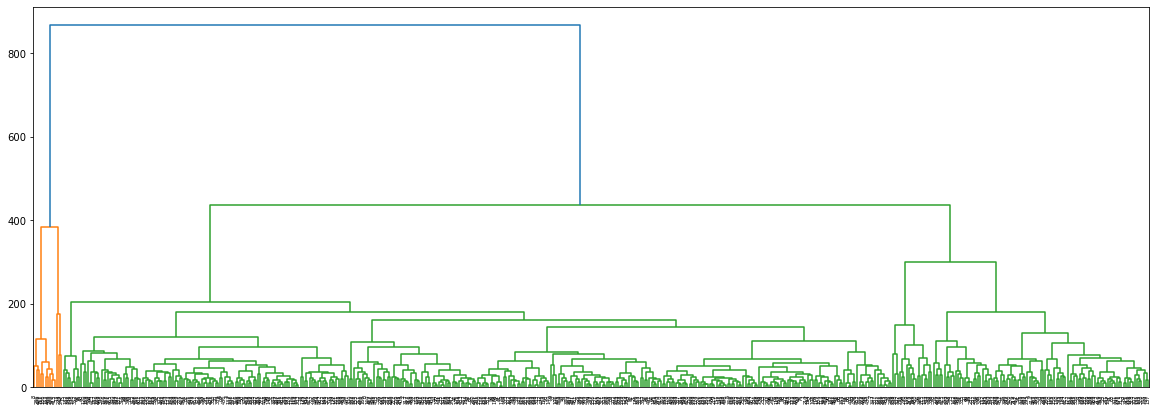

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()


In [99]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_model.fit_predict(df)
labels = hc_model.labels_
labels
df['K Means'] = labels

In [100]:
df.groupby('K Means').agg(Kehamilan = ('Pregnancies', pd.Series.mean),
Glukosa = ('Glucose', pd.Series.mean),
Ketebalan_Kulit = ('SkinThickness', pd.Series.mean),
Insulin = ('Insulin', pd.Series.mean),
BMI = ('BMI', pd.Series.mean),
Keturunan_Diabetes = ('DiabetesPedigreeFunction', pd.Series.mean),
Umur = ('Age', pd.Series.mean),
Count = ('K Means', 'count')
)

,Kehamilan,Glukosa,Ketebalan_Kulit,Insulin,BMI,Keturunan_Diabetes,Umur,Count
K Means,,,,,,,,
0,2.846154,171.230769,37.538462,562.230769,37.292308,0.806231,34.307692,13
1,4.021505,133.483871,30.580645,157.924731,34.438710,0.550602,33.301075,93
2,4.291498,120.174089,11.975709,0.433198,30.948178,0.437081,35.238866,247
3,4.666667,151.090909,30.939394,297.606061,35.745455,0.553242,35.575758,33
4,2.415929,99.530973,26.159292,72.486726,30.521239,0.480531,27.336283,113


### Partitioning(K Means)

In [101]:
# set the parameter for evaluating K
SSE = []
# check the inertia for each K
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 SSE.append(kmeans.inertia_)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

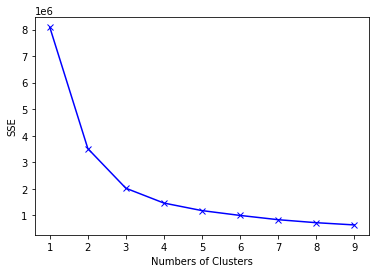

In [102]:
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [103]:
k = KneeLocator(range(1,10), SSE, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  3


In [104]:
kmeans = KMeans(n_clusters=5, random_state = 0, init = 'random', max_iter=300)
y_kmeans = kmeans.fit_predict(df)
y_kmeans    
df['K Means'] = y_kmeans

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [105]:
df.groupby('K Means').agg(Kehamilan = ('Pregnancies', pd.Series.mean),
Glukosa = ('Glucose', pd.Series.mean),
Ketebalan_Kulit = ('SkinThickness', pd.Series.mean),
Insulin = ('Insulin', pd.Series.mean),
BMI = ('BMI', pd.Series.mean),
Keturunan_Diabetes = ('DiabetesPedigreeFunction', pd.Series.mean),
Umur = ('Age', pd.Series.mean),
Count = ('K Means', 'count')
)

,Kehamilan,Glukosa,Ketebalan_Kulit,Insulin,BMI,Keturunan_Diabetes,Umur,Count
K Means,,,,,,,,
0,3.376812,120.565217,28.550725,116.000000,32.490580,0.533609,30.471014,138
1,3.133333,165.400000,35.666667,541.733333,36.260000,0.743467,33.400000,15
2,4.579439,150.523364,8.953271,0.401869,33.778505,0.484178,39.140187,107
3,3.962264,142.924528,33.075472,255.622642,36.367925,0.570189,35.735849,53
4,3.682796,95.462366,16.564516,12.849462,28.983333,0.405301,30.763441,186
